### Pima Indian Diabetes Prediction

###### Context:
The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.The main objective is to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

###### Source:
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
#import packages like pandas,numpy,matplotlib,seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Data from csv stored in the local machine
df=pd.read_csv("C:\\Users\\vishal\\Desktop\\DATA SCIENCE\\Datasets\\diabetes.csv")

In [3]:
#Displaying first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Shape of the dataset
df.shape

(768, 9)

In [5]:
#Number of rows in the dataset
len(df.index)

768

In [6]:
#Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Description of all the features and targets.
df.describe(percentiles=[0.25,0.5,.75,.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
99%,13.000000,196.000000,106.000000,51.330000,519.900000,50.759000,1.698330,67.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

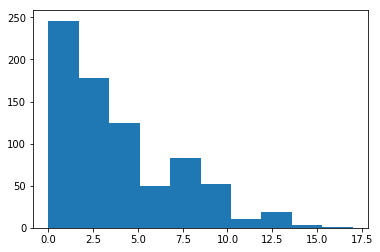

In [8]:
#Plotting the histogram of the feature Pregnancies
plt.hist(df['Pregnancies'],bins=10)

# Data Cleaning

In [9]:
'''From the description it can be concluded that there is a huge difference between the max and 99%ile value of some features 
Hence we will retain only those values which are less than 99%ile'''

df=df[df["Insulin"]<df["Insulin"].quantile(0.99)]

In [10]:
df.shape #Here 8 rows have been deleted

(760, 9)

In [11]:
df=df[df["Pregnancies"]<df["Pregnancies"].quantile(0.99)]

In [12]:
df.shape

(746, 9)

In [13]:
df=df[df["SkinThickness"]<=df["SkinThickness"].quantile(0.99)]

In [14]:
df.shape

(738, 9)

In [15]:
df=df[df["BloodPressure"]<=df["BloodPressure"].quantile(0.99)]

In [16]:
df.shape

(732, 9)

In [17]:
df=df[df["BMI"]<=df["BMI"].quantile(0.99)]

In [18]:
df.shape

(724, 9)

In [19]:
df=df[df["DiabetesPedigreeFunction"]<=df["DiabetesPedigreeFunction"].quantile(0.99)]

In [20]:
df.shape

(716, 9)

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,3.727654,119.569832,68.590782,19.766760,74.210894,31.417737,0.450919,33.022346,0.331006
std,3.129354,31.511781,18.877489,15.248893,100.146111,7.251662,0.285455,11.753151,0.470904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.239750,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,24.000000,31.600000,0.365000,29.000000,0.000000
75%,6.000000,138.250000,80.000000,32.000000,125.250000,35.800000,0.605000,40.000000,1.000000
max,12.000000,199.000000,106.000000,50.000000,510.000000,47.900000,1.476000,81.000000,1.000000


In [22]:
#Now it can be noted that since BloodPressure,Glucose,SkinThickness,Insulin,BMI cannot be zero we will try to analyse it

In [23]:
len(df[df['Glucose']==0].index) 
#There are 5 rows which have glucose value as 0

5

In [24]:
len(df[df['BloodPressure']==0].index)

33

In [25]:
len(df[df['SkinThickness']==0].index)

216

In [26]:
len(df[df['Insulin']==0].index)

351

In [27]:
len(df[df['BMI']==0].index)

10

In [28]:
#Now we will replace these values with np.nan and then impute them according to mean/median.
df['BloodPressure'].replace(0,np.nan,inplace=True)

In [29]:
df[['Glucose','SkinThickness','Insulin','BMI']]=df[['Glucose','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [30]:
#We can see null values in the dataset
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                33
SkinThickness               216
Insulin                     351
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [31]:
#Imputing the rows in which glucose value is null by the mean value of glucose from that column.
df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)

In [32]:
df['BloodPressure'].fillna(df['BloodPressure'].mean(),inplace=True)

In [33]:
df['SkinThickness'].value_counts().head()

32.0    30
30.0    25
27.0    22
23.0    20
18.0    20
Name: SkinThickness, dtype: int64

In [34]:
#Imputing the rows in which SkinThickness value is null by the mean value of SkinThickness from that column.
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)

In [35]:
df['Insulin'].value_counts().head()

105.0    11
130.0     8
120.0     8
140.0     8
94.0      7
Name: Insulin, dtype: int64

In [36]:
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)

In [37]:
df['BMI'].value_counts().head()

32.0    13
31.6    12
31.2    11
33.3    10
32.4    10
Name: BMI, dtype: int64

In [38]:
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [39]:
#The data has been cleaned and allthe values have been imputed accordingly
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [40]:
#Description of the cleaned Data
df.describe(percentiles=[0.25,0.5,.75,.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,3.727654,120.410689,71.904832,28.515363,135.488827,31.864665,0.450919,33.022346,0.331006
std,3.129354,29.871568,11.345854,7.975034,69.510868,6.211770,0.285455,11.753151,0.470904
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,120.000000,27.375000,0.239750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,29.000000,125.000000,32.000000,0.365000,29.000000,0.000000
75%,6.000000,138.250000,80.000000,32.000000,125.250000,35.800000,0.605000,40.000000,1.000000
99%,12.000000,194.850000,99.700000,47.850000,468.900000,46.185000,1.348200,67.000000,1.000000
max,12.000000,199.000000,106.000000,50.000000,510.000000,47.900000,1.476000,81.000000,1.000000


In [41]:
df.shape

(716, 9)

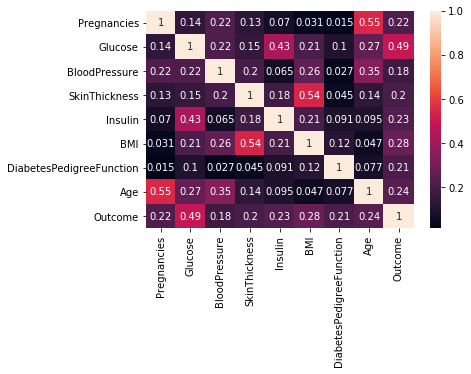

In [42]:
#Correlation Matrix
corr=df.corr()
sns.heatmap(corr,annot=True)


###### Separting the data into features(X) and target(y) and printing their shape

In [43]:
X=df.drop(columns=['Outcome'],axis=1).values
y=df['Outcome'].values
print(X.shape)
print(y.shape)


(716, 8)
(716,)


###### Performing Standardisation on the cleaned feature data(X) so that we can bring them on the same scale from -2 to +2

In [44]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
X=scl.fit_transform(X)

###### Splitting the data into train and test data(33%) 

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(479, 8)
(237, 8)
(479,)
(237,)


# Logistic Regression Model

In [46]:
#Importing logistic regression from scikitlearn and fiting the model

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
#Perform KFold(5) Cross validation on the data to calculate the training accuracy

from sklearn.model_selection import KFold,cross_val_score
folds=KFold(n_splits=5,shuffle=True,random_state=10)
scores=cross_val_score(estimator=logreg,X=X_train,y=y_train,cv=folds)
print(scores)
print(scores.mean())

[0.82291667 0.71875    0.76041667 0.72916667 0.74736842]
0.7557236842105263


In [48]:
#Making Predictions using predict method of logreg and store the results in y_pred

y_pred=logreg.predict(X_test)

In [49]:
#Importing libraries like Confusion Matrix,Classification Report,Accuracy Score to evaluate the metrics 

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusion Matrix :\n",
      confusion_matrix(y_test,y_pred))

Confusion Matrix :
 [[146  17]
 [ 32  42]]


In [50]:
print("Classification Report :\n",classification_report(y_test,y_pred))

Classification Report :
              precision    recall  f1-score   support

          0       0.82      0.90      0.86       163
          1       0.71      0.57      0.63        74

avg / total       0.79      0.79      0.79       237



In [51]:
print("Accuracy :",accuracy_score(y_test,y_pred))

Accuracy : 0.7932489451476793


In [52]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

# ROC-AUC Curve

In [53]:
#Importing roc_curve from sklearn.metrics
from sklearn.metrics import roc_curve

In [54]:
#predict probabilities using logreg.predict_proba like we predicted classes using logreg.predict
y_test_proba=logreg.predict_proba(X_test)

#Retaing only the probabilities having the label as positive which are in the 2nd column
prob=y_test_proba[:,1]

In [55]:
prob

array([0.12033112, 0.50879757, 0.61130502, 0.33120316, 0.24138748,
       0.07844152, 0.05518422, 0.47921382, 0.02040385, 0.10943696,
       0.03294145, 0.65941637, 0.78959833, 0.06042483, 0.7388095 ,
       0.4012091 , 0.19597903, 0.24650112, 0.264003  , 0.13725761,
       0.02432799, 0.5721696 , 0.88958089, 0.14779686, 0.3773493 ,
       0.46015855, 0.30611217, 0.03363565, 0.14348692, 0.23434031,
       0.11372672, 0.06774761, 0.04212308, 0.27207062, 0.22720187,
       0.53273018, 0.05779144, 0.06540169, 0.92344687, 0.09401393,
       0.03372987, 0.71321176, 0.632915  , 0.12506185, 0.33242538,
       0.01295952, 0.31445911, 0.19597395, 0.04927164, 0.06427684,
       0.12967965, 0.12122356, 0.12923902, 0.11307635, 0.74166249,
       0.10913654, 0.45744042, 0.0514663 , 0.78026708, 0.08124244,
       0.88023072, 0.75894889, 0.26080926, 0.23175053, 0.13150341,
       0.17441335, 0.08208888, 0.63547403, 0.02842251, 0.91707989,
       0.0177821 , 0.08808524, 0.9577656 , 0.08029934, 0.53033

In [56]:
#Calculating the fpr,tpr and threshold
fpr,tpr,threshold=roc_curve(y_test,prob)
print(fpr.shape)
print(tpr.shape)
print(threshold)

(71,)
(71,)
[0.9577656  0.88872143 0.88023072 0.7388095  0.71327248 0.71321176
 0.70801794 0.65395725 0.64556331 0.63547403 0.632915   0.61498838
 0.61130502 0.60359723 0.6014108  0.59409297 0.58815697 0.53273018
 0.53203374 0.5303387  0.50170254 0.49833141 0.47933215 0.47921382
 0.46847931 0.46256183 0.45744042 0.4417983  0.40751571 0.40137529
 0.39163002 0.38600107 0.38318676 0.37861992 0.37654584 0.3500083
 0.33521288 0.33303416 0.31724766 0.31284916 0.30876987 0.30832264
 0.30611217 0.30296661 0.28776595 0.2874857  0.26080926 0.2480688
 0.24668732 0.24650112 0.24138748 0.23659263 0.23175053 0.22720187
 0.21947973 0.21635451 0.17924732 0.17721786 0.16584501 0.16583991
 0.13150341 0.12967965 0.12923902 0.12879226 0.12243814 0.12200418
 0.10540984 0.10352733 0.07259971 0.07028986 0.01295952]


Text(0.5,1,'ROC-AUC curve')

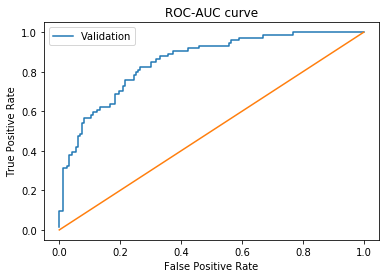

In [57]:
#Plot of FPR(on x-axis) Vs TPR(on Y-axis)
plt.plot(fpr,tpr,label='Validation')
plt.plot([0,1],[0,1])
plt.legend(loc=0)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC curve")

In [58]:
#Calculating the area under the curve of ROC(Reciever Operating Characteristic)
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,prob)
print("AUC :",auc)

AUC : 0.8519316862875146


# KNN Model

In [59]:
# import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [60]:
#Create an object with name knn of class KNeighborsClassifier, specify n_neighbors=1 as parameter
knn=KNeighborsClassifier(n_neighbors=1)

#call fit method of knn object on training data set
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [61]:
#perform k-fold cross validation with n_splits=5

folds_1=KFold(n_splits=5,shuffle=False,random_state=10)
scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=folds_1)
print(scores.mean())

0.6784429824561403


In [62]:
#Calculate training accuracy using knn.score method
print("Training Accuracy :",knn.score(X_train,y_train))

Training Accuracy : 1.0


In [63]:
#Calculate training accuracy using knn.score method
print("Testing Accuracy :",knn.score(X_test,y_test))

Testing Accuracy : 0.7341772151898734


In [64]:
#Predicting y using predict method of knn
y_pred=knn.predict(X_test)

In [65]:
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred))

Confusion Matrix :
 [[133  30]
 [ 33  41]]


In [66]:
print("Classification Report :\n",classification_report(y_test,y_pred))


Classification Report :
              precision    recall  f1-score   support

          0       0.80      0.82      0.81       163
          1       0.58      0.55      0.57        74

avg / total       0.73      0.73      0.73       237



In [67]:
print("Accuracy Score :",accuracy_score(y_test,y_pred))

Accuracy Score : 0.7341772151898734


In [68]:
print("KNN Score of test data :",knn.score(X_test,y_test))

KNN Score of test data : 0.7341772151898734


###### Here we can notice that accuracy score and knn score are same

# Tuning K

In [69]:
#Taking 14 values of K
neighbors=np.arange(1,15)

##empty arrays to hold train & test accuracies
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

In [70]:
"""Iterate over different values of K and calculate 
train & test accuracies against each K"""

for i,k in enumerate(neighbors):
    knn_m=KNeighborsClassifier(n_neighbors=k)
    knn_m.fit(X_train,y_train)
    train_accuracy[i]=knn_m.score(X_train,y_train)
    test_accuracy[i]=knn_m.score(X_test,y_test)
    

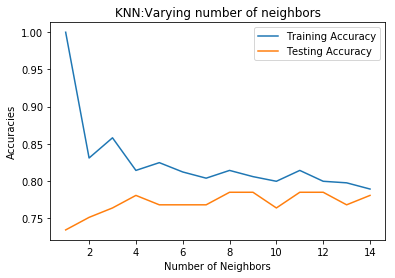

In [71]:
#plot of K Vs train & test accuracies to figure out best value of K
plt.plot(neighbors,train_accuracy,label="Training Accuracy")
plt.plot(neighbors,test_accuracy,label="Testing Accuracy")
plt.legend(loc=0)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracies")
plt.title("KNN:Varying number of neighbors")
plt.show()

#### Best value of K appears to be 9 because the difference between training and testing accuracies is less and the accuracies appear to be less varying further



In [72]:
#with best K again fit the model and print training, k-fold cross val and test score accuracies
knn_2=KNeighborsClassifier(n_neighbors=9)
knn_2.fit(X_train,y_train)

print("Training Accuracy when k=5 is",knn_2.score(X_train,y_train))


folds = KFold(n_splits=5,shuffle=False,random_state=10)
scores = cross_val_score(knn_2,X=X_train,y=y_train,cv=folds)#write your codes)
print("Training Accuracy mean of 5-fold cross validation is",scores.mean())

print("Testing Accuracy when k=5 is",knn_2.score(X_test,y_test))


Training Accuracy when k=5 is 0.8058455114822547
Training Accuracy mean of 5-fold cross validation is 0.7411842105263158
Testing Accuracy when k=5 is 0.7848101265822784


## Naive Bayes Model

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
gmodel=GaussianNB()

In [75]:
gmodel.fit(X_train,y_train)

GaussianNB(priors=None)

In [76]:
pred_y=gmodel.predict(X_test)

In [77]:
pred_y[:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [78]:
folds=KFold(n_splits=5,shuffle=False,random_state=10)
accuracys=cross_val_score(estimator=gmodel,X=X_train,y=y_train,cv=folds)
print(accuracys)
print(accuracys.mean())

[0.72916667 0.70833333 0.72916667 0.77083333 0.76842105]
0.7411842105263158


In [79]:
print("Confusion Matrix : \n",confusion_matrix(y_test,pred_y))

Confusion Matrix : 
 [[138  25]
 [ 30  44]]


In [80]:
print("Classification Report : \n",classification_report(y_test,pred_y))

Classification Report : 
              precision    recall  f1-score   support

          0       0.82      0.85      0.83       163
          1       0.64      0.59      0.62        74

avg / total       0.76      0.77      0.77       237



In [81]:
print("Accuracy for Naive Bayes Model is :",accuracy_score(y_test,pred_y))

Accuracy for Naive Bayes Model is : 0.7679324894514767


## SVM Model

In [82]:
from sklearn.svm import SVC

In [98]:
svm_model=SVC(C=1,kernel='linear')

In [99]:
svm_model.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [100]:
y_pred_svm=svm_model.predict(X_test)

In [101]:
folds=KFold(n_splits=5,shuffle=False,random_state=10)
accuracie=cross_val_score(estimator=svm_model,X=X_train,y=y_train,cv=folds)
print(accuracie)
print("Training Accuracy Mean is ",accuracie.mean())

[0.76041667 0.69791667 0.78125    0.77083333 0.8       ]
Training Accuracy Mean is  0.7620833333333333


In [102]:
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred_svm))

Confusion Matrix : 
 [[148  15]
 [ 34  40]]


In [103]:
print("Classification Report : \n",classification_report(y_test,y_pred_svm))

Classification Report : 
              precision    recall  f1-score   support

          0       0.81      0.91      0.86       163
          1       0.73      0.54      0.62        74

avg / total       0.79      0.79      0.78       237



In [104]:
print("Accuracy for SVM Linear Model is :",accuracy_score(y_test,y_pred_svm))

Accuracy for SVM Linear Model is : 0.7932489451476793


## Non Linear SVM

In [119]:
svm_rbf=SVC(C=1.0,kernel='rbf')

In [120]:
svm_rbf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [121]:
y_pred_rbf=svm_rbf.predict(X_test)

In [122]:
folds=KFold(n_splits=5,shuffle=False,random_state=10)
accuracie=cross_val_score(estimator=svm_rbf,X=X_train,y=y_train,cv=folds)
print(accuracie)
print("Training Accuracy Mean is ",accuracie.mean())

[0.73958333 0.75       0.77083333 0.69791667 0.78947368]
Training Accuracy Mean is  0.7495614035087719


In [123]:
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred_rbf))

Confusion Matrix : 
 [[146  17]
 [ 40  34]]


In [124]:
print("Classification Report : \n",classification_report(y_test,y_pred_rbf))

Classification Report : 
              precision    recall  f1-score   support

          0       0.78      0.90      0.84       163
          1       0.67      0.46      0.54        74

avg / total       0.75      0.76      0.75       237



In [125]:
print("Accuracy for SVM Non-Linear Model is :",accuracy_score(y_test,y_pred_rbf))

Accuracy for SVM Non-Linear Model is : 0.759493670886076


- **Logistic Regression gives an accuracy of 79.32%**
- **KNN Model gives an accuracy of 78.48%**
- **Naive Bayes Model gives an accuracy of 76.79%**
- **Linear SVM gives an accuracy of 79.32%**
- **Non Linear SVM gives an accuracy of 75.94 %**